<a href="https://colab.research.google.com/github/xinqisun/assignment-2/blob/master/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 
 **Xinqi Sun 12792267** 

*   github: [https://github.com/xinqisun/assignment-2/blob/master/assignment_2.ipynb](https://)







1.   **Introduction**

The algorithm should be of a similar level of sophistication as the ID3 decision tree building algorithm. Machine learning stems from artificial intelligence and statistics. After two decades of active and calm periods, the first International Forum on Machine Learning, held in 1980, marked the full recovery of machine learning. Machine learning has begun to affect all walks of life in civil society, such as self-driving in the consumer sector. The data was extracted from the US 1994 Census database and can be used to predict whether household income exceeds 50K/year. The data set class variable is whether the annual income exceeds 50k$. The attribute variable contains important information such as age, job type, education, occupation, and ethnicity. It is worth mentioning that there are 7 category variables among the 14 attribute variables.






2.**Exploration**

The data set characteristics are multivariate. It contains 48,842 instances. Data is from American society. The data types are categorical and integer. There are 14 attributes in total. And it contains missing values. The following picture shows our EDA analysis of the data.

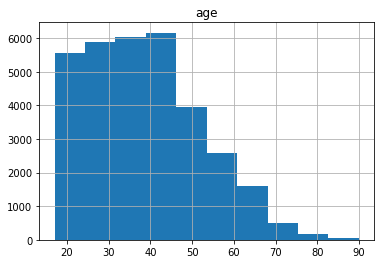

In [0]:
from sklearn import datasets,model_selection
from sklearn.preprocessing import LabelEncoder
import pandas as  pd
import matplotlib.pyplot as plt
adult_train=pd.read_csv('adult.csv',header=None, na_values=' ?')
adult_test=pd.read_csv('adulttest.csv',header=None, na_values=' ?')
Names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']
adult_test.columns = Names
adult_train.columns = Names


adult_train['age'].hist()
plt.title('age')
plt.show()

We plan to use a variety of machine learning models to fit the data. Such as ID3 decision Tree, KNN, and random forest algorithms, etc.
The main algorithm of symbolism is the Decision Tree. As a kind of method that imitates the human brain to deal with decision-making problems in daily life, the decision tree has a binary tree structure like the two classification tasks such as “whether” or “good or bad”. In the process of getting the conclusion of the problem, that is, the final decision, all the accumulation of the judgments of the sub-decisions of each feature in the data makes the scope of the solution shrink. Generally speaking, a complete decision tree consists of a root node containing data and feature ensembles, several process nodes that represent feature decisions, and corresponding leaf nodes that represent decision results. Among them, one of the core problems in decision tree learning is feature partitioning. Three classical partitioning methods form three representative algorithms for decision trees: ID3, C4.5, and CART. The ID3 algorithm is a greedy algorithm proposed by J. Ross Quinlan in 1975 to construct a decision tree. It is based on the "Occam razor", that is, the smaller the decision tree, the better the decision tree. According to the feature selection and the information gain evaluation in the ID3 algorithm, the feature with the largest information gain is selected as the branching criterion each time. ID3 algorithm can segment nominal data sets without pruning. To eliminate excessive data matching, adjacent leaf nodes that do not generate a large amount of information gain can be merged (for example, by setting an information gain threshold). One disadvantage of using information gain is that it favors properties with a large number of values -- that is, in a training set, the more a property accepts a different value, the more likely it is to use it as a segmentation property. Sometimes it makes no sense. In addition, ID3 cannot handle continuously distributed data characteristics.


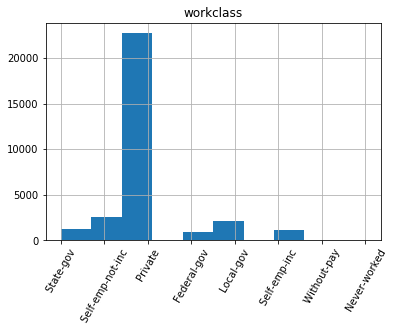

In [0]:
adult_train['workclass'].hist()
plt.xticks(rotation=60)
plt.title('workclass')
plt.show()

This ID3 algorithm can be to sum up as follows: Using all unused features and calculate the sample entropy associated with it. Attributes with the smallest entropy will be left behind. Generating a node with this attribute.
The KNN algorithm is a famous artificial intelligence statistical learning algorithm, which accounts for a large proportion in machine learning, which is one of the simplest machine learning algorithms simultaneously. The K Nearest Neighbor algorithm, also known as the KNN algorithm, is a classic distance classifier algorithm in machine learning.


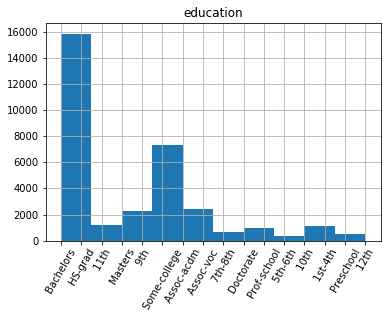

In [0]:
adult_train['education'].hist()
plt.xticks(rotation=60)
plt.title('education')
plt.show()

There are supervised learning methods and unsupervised learning methods in machine learning field according to different training samples. Supervised learning, also known as teacher learning, requires knowledge of which category each sample in the training sample set belongs to; unsupervised learning, also known as non-teacher learning, only knows each training sample in the training sample set, I don't know the category to which each training sample belongs, and even in some cases the number of categories is unknown. Distance classifiers are the primary method in supervised learning methods that rely primarily on the distance (or degree of similarity) between patterns to construct classifiers, sometimes referred to as "template matching." The distance classifier is characterized by simple algorithm and high efficiency of classifier learning and recognition. It is still one of the main methods to solve the identification problem, especially the application scenarios where the number of certain categories is relatively large and the recognition speed is relatively fast.

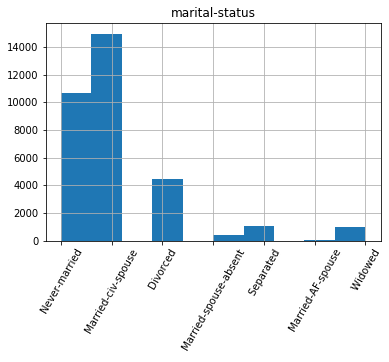

In [0]:
adult_train['marital-status'].hist()
plt.xticks(rotation=60)
plt.title('marital-status')
plt.show()

The representative of unsupervised learning is the cluster analysis method. These methods still use the distance to measure the similarity between the patterns, and then divide the different subsets according to the similarity of the samples in the unsupervised sample set to achieve unsupervised samples. Clustering.
Random forest is an integrated algorithm (integrated learning), belonging to the bag type. By combining several weak classifiers and voting or averaging the final results, the results of the whole model have higher accuracy and generalization performance. It achieved satisfactory results mainly because of "randomness" and "forest", which made it resist overfitting and which made it more accurate. 
Bagging, also known as bootstrap aggregating, is an integrated technique for training classifiers by re-selecting k new data sets on the original dataset. It uses the set of trained classifiers to classify the new samples, and then uses the majority vote or the mean of the output to count the classification results of all classifiers. The highest category is the final tag. Such algorithms can effectively reduce bias and reduce variance. Random Forest (RF) is a Bagging algorithm. In fact, after the introduction of the Bagging algorithm, the random forest is almost ready. RF is just some details about the details.


In [0]:
adult_train['education-num'].hist()
plt.xticks(rotation=60)
plt.title('education-num')
plt.show()

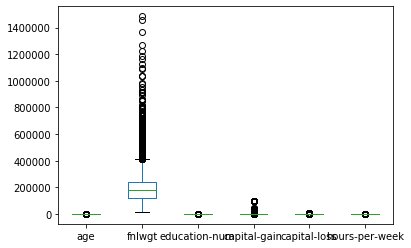

In [0]:

adult_train.plot(kind='box')
plt.show()

In [0]:
adult_train['age_set'] = pd.cut(adult_train['age'], bins=4, labels=['Teenager', 'young man', 'elder', 'old man'])

In [0]:
adult_train_good = adult_train.drop(['fnlwgt','hours-per-week','capital-gain','capital-loss'],axis=1)
print(adult_train_good.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country', 'income',
       'age_set'],
      dtype='object')


In [0]:
print(adult_train_good.isnull().sum()/adult_train_good.shape[0])


age               0.000000
workclass         0.056386
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.017905
income            0.000000
age_set           0.000000
dtype: float64


In [0]:
X_train = adult_train_good.drop(['income','age'], axis=1)
Y_train = adult_train_good['income']
X_train = pd.get_dummies(X_train, prefix_sep=':', columns=['workclass', 'education', 'education-num',
                                                                 'marital-status', 'occupation','race',
                                                                 'relationship', 'sex', 'native-country'
                                                           ,'age_set'], dummy_na=True)
X_train.head()

,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,workclass: Private,workclass: Self-emp-inc,workclass: Self-emp-not-inc,workclass: State-gov,workclass: Without-pay,workclass:nan,education: 10th,...,native-country: Trinadad&Tobago,native-country: United-States,native-country: Vietnam,native-country: Yugoslavia,native-country:nan,age_set:Teenager,age_set:young man,age_set:elder,age_set:old man,age_set:nan
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [0]:
Y_train = pd.get_dummies(Y_train, drop_first=True).iloc[:,0]              # 取一列


NameError: name 'Y_train' is not defined

3.   **Methodology**

We first use several pre-designed machine learning models to fit the data. And divide the age into 4 parts according to 'Teenager', 'young man', 'elder', 'old man'. Then we use the train_test_split in sklearn.model_selection to separate the training set from the test set. Because the dataset contains data of many category types, we use LabelEncoder in sklearn.preprocessing to convert categorical data into numeric data and increase the data dimension. 


In [0]:
from sklearn.model_selection import train_test_split
X = X_train
y = Y_train

X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state=12345)
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler().fit(X_train)            

Xtrain = Standard.transform(X_train)                 
Xtest = Standard.transform(X_test)                   


from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = clf.predict(Xtest)


from sklearn.metrics import classification_report, auc
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89      4956
          1       0.66      0.55      0.60      1557

avg / total       0.82      0.82      0.82      6513



4. **Evaluation** 

Finally, we get the results of the data on each model and the training test curve. The following figure shows the training test score chart of the ID3 algorithm.

In [0]:
#ID3
maxdepth = 40
import numpy as np
from sklearn import tree
       #Dividing datasets
depths=np.arange(1,maxdepth)
training_scores=[]
testing_scores=[]
for depth in depths:     #Decision trees at different depths
    clf = tree.DecisionTreeClassifier(max_depth=depth)      #define Decision trees 
    clf.fit(X_train, y_train)      #fit the model
    training_scores.append(clf.score(X_train,y_train))       #get the train score
    testing_scores.append(clf.score(X_test,y_test))     #get the test score

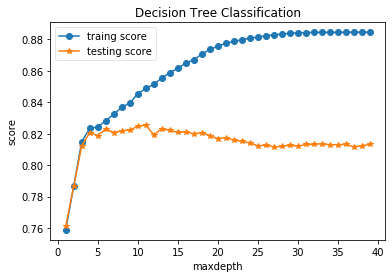

In [0]:
import matplotlib.pyplot as plt        #draw the trainning process
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(depths,training_scores,label="traing score",marker='o')
ax.plot(depths,testing_scores,label="testing score",marker='*')
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.set_title("Decision Tree Classification")
ax.legend(framealpha=0.5,loc='best')
plt.show()

The accuracy of K-Nearest Neighbor Classifier is 0.9736842105263158
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.93      1.00      0.96        13
  virginica       1.00      0.92      0.96        12

avg / total       0.98      0.97      0.97        38



In [0]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print ('The accuracy of Random forest Classifier is', model.score(X_test, y_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

The accuracy of Random forest Classifier is 0.8261937663135268
             precision    recall  f1-score   support

          0       0.87      0.90      0.89      4956
          1       0.65      0.58      0.61      1557

avg / total       0.82      0.83      0.82      6513



5. **Conclusion**

From the above experimental data, we can see that the random forest has many shortcomings. Due to the increased disturbance of the attributes, the performance of the base learner in the random forest is reduced, which makes the performance of the random forest at the beginning poor, but with the base learner Increased, random forests usually converge to lower generalization errors, compared to Bagging. It is sensitive to the number of attributes considered for each partition. The random forest approach has proven to be very good for large data sets and items that have large and sometimes unrelated features. It is easy to overfit when the noise is large. Of course, random forests have many advantages. Reduce over-fitting: the introduction of two randomness makes it difficult for random forest to fall into over-fitting and has good anti-noise ability. Since only a few attributes are considered in each partition, it may be faster than Bagging and Boosting, so they are very effective on large databases. So compared to Bagging, the computational cost is smaller and the training efficiency is higher. Data preprocessing: adaptability to data, can handle discrete and continuous, no need to standardize. Missing value processing: There are good ways to fill in missing values and still maintain high accuracy even if a large portion of the data is missing. An intrinsic estimate of the importance of the variable is given, which balances the error for unbalanced sample classification. Can calculate the intimacy of each instance, useful for data mining, detecting outliers, and data visualization.
Of course, the KNN model also has many shortcomings. The computational complexity of the classification is proportional to the total number of samples in the training set. The algorithm itself is simple and effective, and the classifier does not need to use the training set for training. For points of unknown category, calculating its distance from points in the known category dataset 
Sort by distance
Select the K points with the smallest distance from the current point
Determine the probability of occurrence of the category of the first k points
Returns the category with the highest frequency of the first k points as the current point prediction classification
Significant shortcomings of the ID3 algorithm are below:
Overfitting: Over-fitting problems are prone to occur, resulting in poor prediction of data outside the training set
Ignore feature associations: Ignore the correlation of attributes in a dataset. When there are many intricate relationships between numerical variables, such as financial data analysis, it is not a good choice.
Model sensitivity: The model is not robust enough, and small changes in one node may cause the entire tree to be very different.
So as the old saying goes, the quality of the model depends to a large extent on the quality of the feature engineering. The feature engineering works well and the model fits the data better.


